# 模仿绘图之散点图

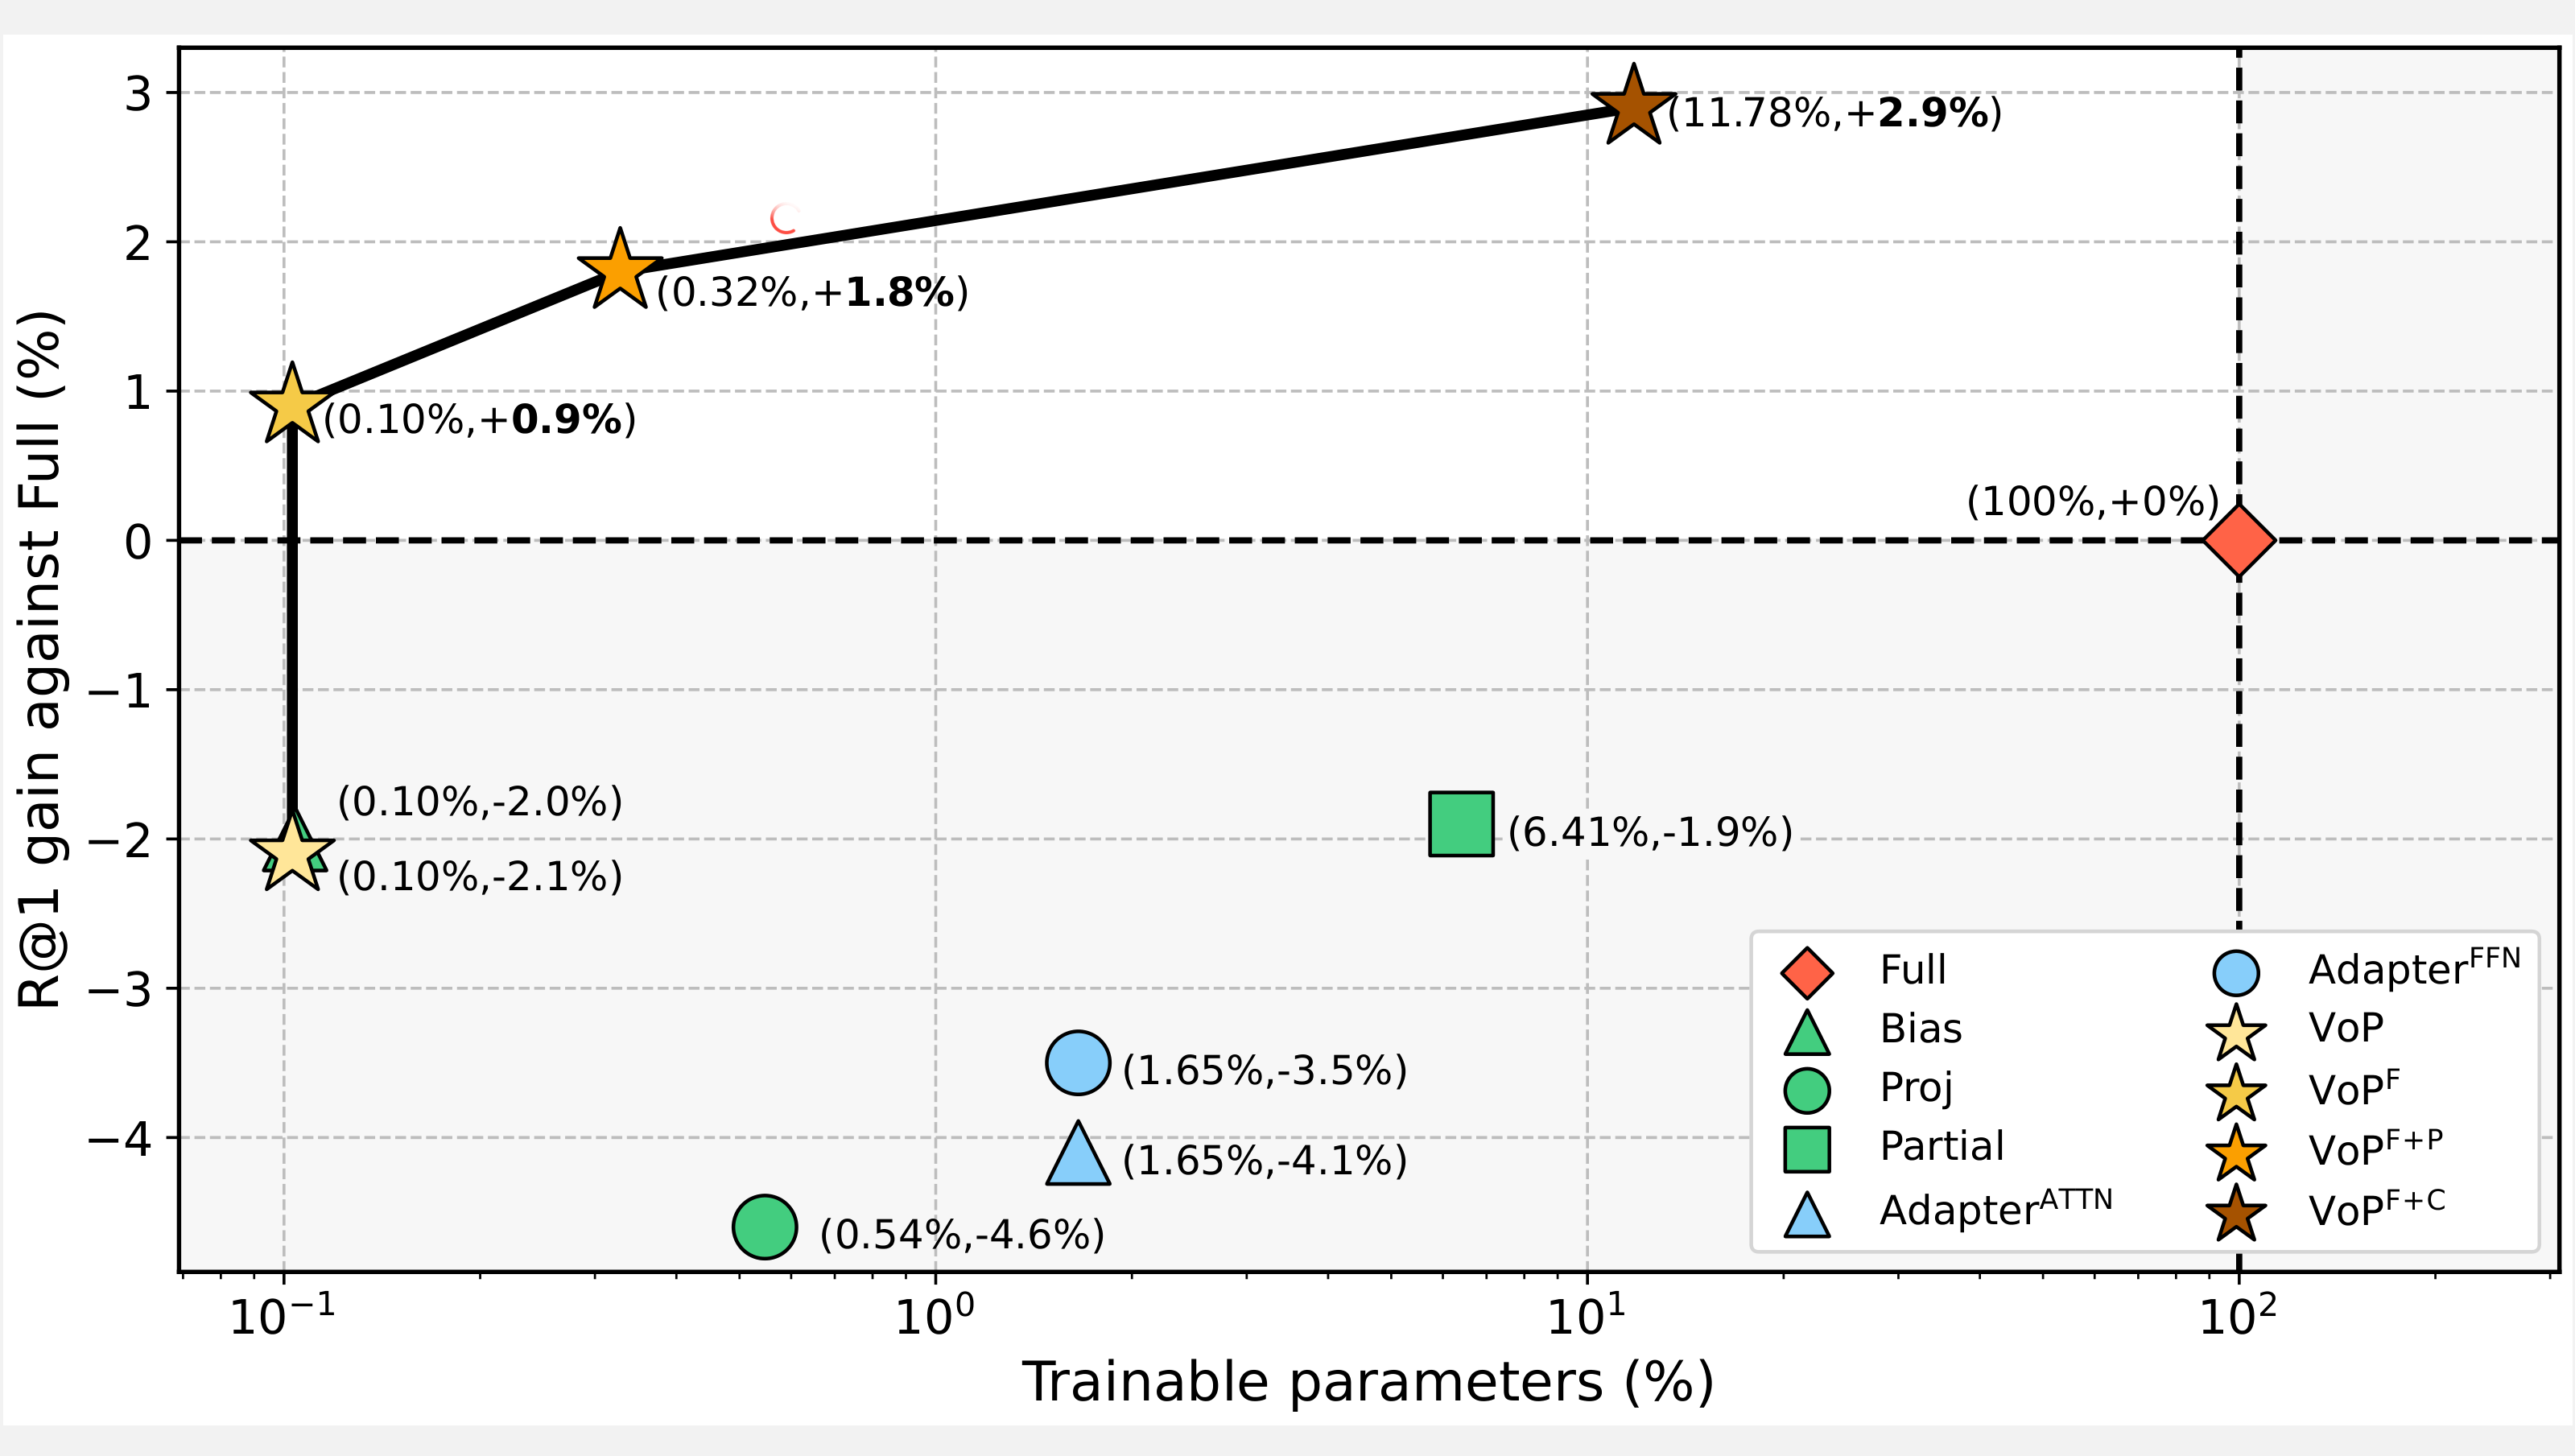

来自论文：[VoP: Text-Video Co-operative Prompt Tuning for Cross-Modal Retrieval](https://arxiv.org/abs/2211.12764)

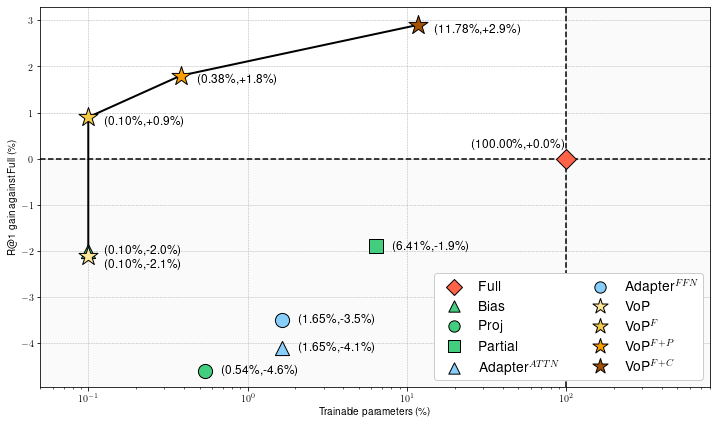

In [83]:
from matplotlib import pyplot as plt
import numpy as np


data = [
    ("Full", (100, 0), (10 ** -0.6, 0.3), "D", 1, [[255, 99, 71]]),
    ("Bias", (0.1, -2.0), (10 ** 0.1, 0), "^", 1, [[67, 205, 127]]),
    ("Proj", (0.54, -4.6), (10 ** 0.1, 0), "o", 1, [[67, 205, 127]]),
    ("Partial", (6.41, -1.9), (10 ** 0.1, 0), "s", 1, [[67, 205, 127]]),
    (r"Adapter$^{ATTN}$", (1.65, -4.1), (10 ** 0.1, 0), "^", 1, [[135, 206, 250]]),
    (r"Adapter$^{FFN}$", (1.65, -3.5), (10 ** 0.1, 0), "o", 1, [[135, 206, 250]]),
    ("VoP", (0.1, -2.1), (10 ** 0.1, -0.2), "*", 2, [[255, 230, 153]]),
    (r"VoP$^{F}$", (0.1, 0.9), (10 ** 0.1, -0.1), "*", 2, [[245, 202, 71]]),
    (r"VoP$^{F+P}$", (0.38, 1.8), (10 ** 0.1, -0.1), "*", 2, [[251, 159, 0]]),
    (r"VoP$^{F+C}$", (11.78, 2.9), (10 ** 0.1, -0.1), "*", 2, [[165, 82, 0]]),
]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 7))

for name, xy, xy_offset, marker, marker_scale, rgb_color in data:
    rgb_color[0] = [c / 255 for c in rgb_color[0]]
    ax.scatter(xy[0],
               xy[1],
               c=rgb_color,
               s=200 * marker_scale,
               marker=marker,
               linewidths=1,
               edgecolors='black',
               label=name,
               zorder=20)
    ax.text(xy[0] * xy_offset[0],
            xy[1] + xy_offset[1],
            f"({xy[0]:.02f}\\%,{xy[1]:+.1f}\\%)",
            color="black", fontsize=12,
            horizontalalignment='left',
            verticalalignment='center',
            zorder=20)


line_xys = [xy for name, xy, xy_offset, marker, marker_scale, rgb_color in data[-4:]]
line_xs = [x for x, y in line_xys]
line_ys = [y for x, y in line_xys]
ax.plot(line_xs, line_ys, color='black', linewidth=2, zorder=10)

ax.fill_betweenx(y=[0, 1], x1=100, x2=800, transform=ax.get_xaxis_transform(), color='lightgray', alpha=0.1)
ax.fill_between(x=[0, 100], y1=-5, y2=0, color='lightgray', alpha=0.1)

ax.set_xscale('log')
ax.set_xlim(left=0.05, right=800)
ax.set_ylim(bottom=-4.95)
ax.set_xlabel(r"Trainable parameters (\%)")
ax.set_ylabel(r"R@1 gain against Full (\%)")

ax.vlines([100], 0, 1, transform=ax.get_xaxis_transform(), colors='black', linestyles="--")
ax.hlines([0], 0, 1, transform=ax.get_yaxis_transform(), colors='black', linestyles="--")
ax.grid(linestyle="--", linewidth=0.5, zorder=0)
ax.legend(loc='lower right', fontsize=14, ncols=2, markerscale=0.8, framealpha=1.0)
plt.show()
